### Activity 9
### 63010026 กฤตศยา นทีมณฑล
### 63010062 กันต์กนิษฐ์ ทองเก๋ง
### 63010339 ณัฐวดี ติณภูมิ

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from keras import datasets, layers, models
from keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense

## (a) Load and Prepare Data

In [345]:
ACC = pd.read_csv("46343_acceleration.txt", sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv("46343_heartrate.txt", sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv("46343_labeled_sleep.txt", sep = ' ',names=['timedelta', 'sleep'])

In [346]:
ACC

,timedelta,accX,accY,accZ
0,-124489.161050,0.017487,-0.586700,-0.805771
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
...,...,...,...,...
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284
981998,17643.026865,0.505737,0.427673,-0.749741


In [347]:
HeartR

,timedelta,heartrate
0,-556410.36066,57
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
...,...,...
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75
4876,16975.47229,76


In [348]:
SleepL

,timedelta,sleep
0,0,-1
1,30,-1
2,60,-1
3,90,-1
4,120,-1
...,...,...
562,16860,0
563,16890,0
564,16920,0
565,16950,0


In [349]:
# Check ''timedelta' max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()
HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()
SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()
print("ACC start:",ACC_min_date,"ACC end:",ACC_max_date)
print("HeartR start:",HeartR_min_date,"HeartR end:",HeartR_max_date)
print("SleepL start:",SleepL_min_date,"SleepL end:",SleepL_max_date)

ACC start: -124489.16105 ACC end: 17643.046417
HeartR start: -556410.36066 HeartR end: 16980.47229
SleepL start: 0 SleepL end: 16980


In [350]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# ACC_new = ACC[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
ACC_new = ACC[(ACC['timedelta'] > ACC_min_date)&(ACC['timedelta'] < ACC_max_date)]
ACC_new

,timedelta,accX,accY,accZ
1,-124489.116395,0.018982,-0.589676,-0.809158
2,-124489.115548,0.020966,-0.580887,-0.815048
3,-124489.114691,0.019485,-0.580872,-0.813583
4,-124489.097700,0.016998,-0.587204,-0.806259
5,-124489.078316,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,17642.946943,0.506226,0.428665,-0.748779
981995,17642.967007,0.505249,0.425720,-0.748764
981996,17642.987576,0.508194,0.429138,-0.750717
981997,17643.006946,0.508179,0.427200,-0.747284


In [351]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# HeartR_new = HeartR[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
HeartR_new = HeartR[(HeartR['timedelta'] > HeartR_min_date)&(HeartR['timedelta'] < HeartR_max_date)]
HeartR_new

,timedelta,heartrate
1,-556408.36062,56
2,-556403.36062,56
3,-556399.36062,57
4,-556389.36062,59
5,-556163.88076,61
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [352]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# SleepL_new = SleepL[(ACC['timedelta'] > ACC_min_date) &(ACC['timedelta'] < ACC_max_date)  & (HeartR['timedelta'] > HeartR_min_date) &(HeartR['timedelta'] < HeartR_max_date) & (SleepL['timedelta'] > SleepL_min_date) &(SleepL['timedelta'] < SleepL_max_date)]
SleepL_new =SleepL[(SleepL['timedelta'] > SleepL_min_date)&(SleepL['timedelta'] <SleepL_max_date)]
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


## Load and Prepare Data (ACC)

In [353]:
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------#  
# # Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))
ACC_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_22408\3782895249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'],unit="s").round('1s'))


,timedelta,accX,accY,accZ
1,-2 days +13:25:11,0.018982,-0.589676,-0.809158
2,-2 days +13:25:11,0.020966,-0.580887,-0.815048
3,-2 days +13:25:11,0.019485,-0.580872,-0.813583
4,-2 days +13:25:11,0.016998,-0.587204,-0.806259
5,-2 days +13:25:11,0.019959,-0.593094,-0.806198
...,...,...,...,...
981994,0 days 04:54:03,0.506226,0.428665,-0.748779
981995,0 days 04:54:03,0.505249,0.425720,-0.748764
981996,0 days 04:54:03,0.508194,0.429138,-0.750717
981997,0 days 04:54:03,0.508179,0.427200,-0.747284


In [354]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean()

In [355]:
# acc_X, acc_Y, acc_Z
ACC_new2 = pd.concat([df_acc_X, df_acc_Y, df_acc_Z], axis=1).reset_index()
ACC_new2

,timedelta,accX,accY,accZ
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241
...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636
19589,0 days 04:54:00,0.502466,0.428149,-0.750749
19590,0 days 04:54:01,0.502944,0.428004,-0.750483
19591,0 days 04:54:02,0.506228,0.428170,-0.748264


In [356]:
# ACC_new2['timedelta'] = ACC_new2['timedelta'] - ACC_new2['timedelta'].min()
# ACC_new2

## Load and Prepare Data (Heart Rate)

In [357]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))
# HeartR_new['timedelta'] = HeartR_new['timedelta'] - HeartR_new['timedelta'].min()
HeartR_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_22408\786107525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'],unit="s").round('1s'))


,timedelta,heartrate
1,-7 days +13:26:32,56
2,-7 days +13:26:37,56
3,-7 days +13:26:41,57
4,-7 days +13:26:51,59
5,-7 days +13:30:36,61
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [358]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()
HeartR_new2

,heartrate
timedelta,
-7 days +13:26:32,56.0
-7 days +13:26:33,56.0
-7 days +13:26:34,56.0
-7 days +13:26:35,56.0
-7 days +13:26:36,56.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


## Load and Prepare Data (Sleep Label)

In [359]:
# ------------ Rounding Sleep Label (Rounding to 1 sec) -------------------------------
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))
# SleepL_new['timedelta'] = SleepL_new['timedelta'] - SleepL_new['timedelta'].min()
SleepL_new

C:\Users\ROG\AppData\Local\Temp\ipykernel_22408\3998733642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'],unit="s").round('1s'))


,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [360]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


## Merge Data and Standardized data

In [361]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(ACC_new2, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [362]:
#Fill NA
#Heart rate
df['heartrate'].fillna(df['heartrate'].median(),inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,NaN
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,NaN
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,NaN
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,NaN
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,NaN
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [363]:
#Fill NA
#Sleep Label
df['sleep'].fillna(0,inplace=True)
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,-2 days +13:25:11,0.016081,-0.585817,-0.811041,86.0,0.0
1,-2 days +13:25:12,0.038944,-0.578258,-0.818431,86.0,0.0
2,-2 days +13:25:13,0.022542,-0.567728,-0.825828,86.0,0.0
3,-2 days +13:25:14,0.017970,-0.570523,-0.821320,86.0,0.0
4,-2 days +13:25:15,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...,...
19588,0 days 04:53:59,0.504763,0.430875,-0.747636,76.0,0.0
19589,0 days 04:54:00,0.502466,0.428149,-0.750749,76.0,0.0
19590,0 days 04:54:01,0.502944,0.428004,-0.750483,76.0,0.0
19591,0 days 04:54:02,0.506228,0.428170,-0.748264,76.0,0.0


In [364]:
#Drop Column
df.drop(columns='timedelta')

,accX,accY,accZ,heartrate,sleep
0,0.016081,-0.585817,-0.811041,86.0,0.0
1,0.038944,-0.578258,-0.818431,86.0,0.0
2,0.022542,-0.567728,-0.825828,86.0,0.0
3,0.017970,-0.570523,-0.821320,86.0,0.0
4,0.038620,-0.565942,-0.827241,86.0,0.0
...,...,...,...,...,...
19588,0.504763,0.430875,-0.747636,76.0,0.0
19589,0.502466,0.428149,-0.750749,76.0,0.0
19590,0.502944,0.428004,-0.750483,76.0,0.0
19591,0.506228,0.428170,-0.748264,76.0,0.0


In [365]:
# Standardized data
scaler = preprocessing.StandardScaler()
feature_columns = df[['accX', 'accY', 'accZ', 'heartrate']]
label_columns = df[['sleep']]
df_feature = pd.DataFrame(scaler.fit_transform(feature_columns.values),index = feature_columns.index,columns=feature_columns.columns)
df_feature

,accX,accY,accZ,heartrate
0,0.067321,-1.272417,-0.730280,0.684847
1,0.124300,-1.251807,-0.739550,0.684847
2,0.083422,-1.223095,-0.748830,0.684847
3,0.072028,-1.230717,-0.743175,0.684847
4,0.123492,-1.218226,-0.750602,0.684847
...,...,...,...,...
19588,1.285227,1.499704,-0.650738,-0.652200
19589,1.279502,1.492272,-0.654644,-0.652200
19590,1.280695,1.491878,-0.654310,-0.652200
19591,1.288878,1.492329,-0.651526,-0.652200


In [366]:
df_label = label_columns
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19588,0.0
19589,0.0
19590,0.0
19591,0.0


In [367]:
df_label.replace(-1,0,inplace=True)

C:\Users\ROG\AppData\Local\Temp\ipykernel_22408\30520036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label.replace(-1,0,inplace=True)


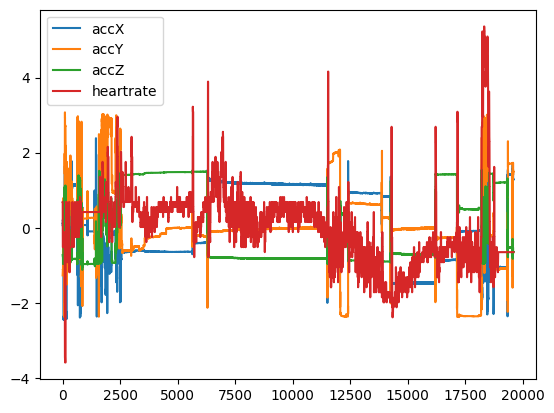

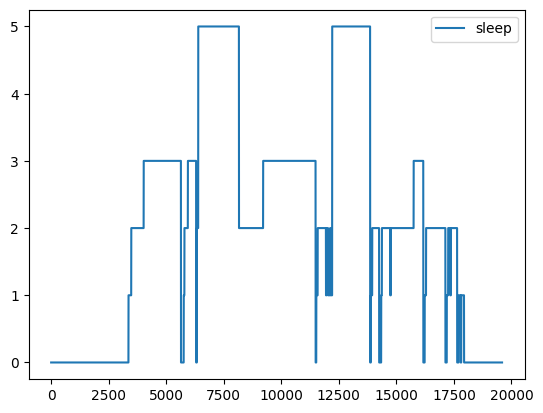

In [368]:
# Visualize signals
df_feature.plot(), df_label.plot()
plt.show()

## Create 3d input

In [369]:
# ------------ 1D to 3D feature-------------------------------
# set sliding window parameter
slidingW = 100
Stride_step = 5
n_features = 4 #number of colums form df_feature
df_feature3D = np.array([],ndmin=2)
df_label_new = np.array([])

for t in range(0 , len(df_feature), Stride_step ):
    F3d = np.array(df_feature[t:t+slidingW],ndmin=2)
    # print(F3d[0])
    if len(F3d) <slidingW:
        break
    F3d.reshape(slidingW, n_features,1)
    # print(df_feature3D.shape)
    # print(F3d.shape)
    if df_feature3D.size == 0 :
        df_feature3D = F3d
    else:
        df_feature3D = np.dstack((df_feature3D,F3d))
    Labels = stats.mode(df_label[t : t+slidingW])
    # print(Labels)
    df_label_new = np.append(df_label_new,Labels[0])
    # print(df_feature3D.shape)
    # print(df_label_new.shape)
    # print(df_feature3D)

# df_feature3D = pd.DataFrame(df_feature3D) 
df_feature3D = np.swapaxes(df_feature3D,0,2)
df_feature3D = np.swapaxes(df_feature3D,1,2)
df_feature3D = df_feature3D[..., np.newaxis]
print(df_feature3D.shape)
print(df_label_new.shape)

C:\Users\ROG\AppData\Local\Temp\ipykernel_22408\702475383.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Labels = stats.mode(df_label[t : t+slidingW])


(3899, 100, 4, 1)
(3899,)


In [370]:
# ------------ Train-Test-Split 2D features -------------------------------
seed = 339
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_feature,df_label,test_size = 0.3, random_state=seed)

In [371]:
# ------------ Train-Test-Split 3D features -------------------------------
x3D_train, x3D_test, y3D_train, y3D_test =  model_selection.train_test_split( df_feature3D , df_label_new,test_size = 0.3, random_state=seed)

In [372]:
# ------------ NN Architecture parameter -------------------------------
Hidden_Layer_param = (30, 30, 30)
mlp = MLPClassifier(hidden_layer_sizes = Hidden_Layer_param)
# View NN model parameters

In [373]:
# ------------ Training NN using 1D features -------------------------------
mlp.fit(X_train,Y_train)
mlp_pred = mlp.predict(X_test)
print(confusion_matrix(Y_test,mlp_pred))
print(classification_report(Y_test,mlp_pred))

c:\Python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1518   28  121   18    4]
 [  15  104  124    1   10]
 [   7   32 1351   67   34]
 [   3    0   63 1332    0]
 [   3    1   54    0  988]]
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      1689
         1.0       0.63      0.41      0.50       254
         2.0       0.79      0.91      0.84      1491
         3.0       0.94      0.95      0.95      1398
         5.0       0.95      0.94      0.95      1046

    accuracy                           0.90      5878
   macro avg       0.86      0.82      0.83      5878
weighted avg       0.90      0.90      0.90      5878



## CNN Model Train Test

In [374]:
# ------------ CNN Architecture parameter -------------------------------
# Nlayer (CNN, dense), Nnode, Activation
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
D_L1 = 512
D_out = 6
n_features = 4
Activation = "relu"
Ker_size = (3,3)
Pooling_size = (2,1)
Input_shape = (slidingW, n_features, 1)

In [375]:
# ------------ Create CNN Model -------------------------------
model = models.Sequential()
model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Activation,input_shape=Input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=Pooling_size))
model.add(Dropout(0.4))
model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation= Activation, padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))
model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation= Activation,padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(D_L1 , activation= Activation ))
model.add(Dense(D_out, activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 100, 4, 16)        160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 50, 4, 16)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 50, 4, 16)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 50, 4, 64)         9280      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 25, 4, 64)        0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 25, 4, 64)       

In [376]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["acc"])

In [377]:
# ------ Train CNN using 3D feature--------------------------------------------
history = model.fit(x3D_train, y3D_train, epochs=50, batch_size=64,validation_data=(x3D_test, y3D_test))

Epoch 1/50


c:\Python36\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


43/43 [==============================] - 4s 76ms/step - loss: 1.0532 - acc: 0.5529 - val_loss: 0.7746 - val_acc: 0.7214
Epoch 2/50
43/43 [==============================] - 3s 68ms/step - loss: 0.6010 - acc: 0.7516 - val_loss: 0.6548 - val_acc: 0.7453
Epoch 3/50
43/43 [==============================] - 3s 74ms/step - loss: 0.4774 - acc: 0.8032 - val_loss: 0.4790 - val_acc: 0.8197
Epoch 4/50
43/43 [==============================] - 3s 72ms/step - loss: 0.4145 - acc: 0.8329 - val_loss: 0.4647 - val_acc: 0.8009
Epoch 5/50
43/43 [==============================] - 3s 78ms/step - loss: 0.3996 - acc: 0.8421 - val_loss: 0.4140 - val_acc: 0.8265
Epoch 6/50
43/43 [==============================] - 3s 75ms/step - loss: 0.3353 - acc: 0.8597 - val_loss: 0.4002 - val_acc: 0.8299
Epoch 7/50
43/43 [==============================] - 3s 72ms/step - loss: 0.3157 - acc: 0.8725 - val_loss: 0.3223 - val_acc: 0.8752
Epoch 8/50
43/43 [==============================] - 3s 70ms/step - loss: 0.2887 - acc: 0.8750 

In [378]:
validation_data=(x3D_test, y3D_test)

In [379]:
# ------- Test CNN -------------------------------
CNN_pred = model.predict(x3D_test)

37/37 [==============================] - 0s 8ms/step


## Performnace of CNN Model

In [380]:
print(y3D_test)

[0. 3. 5. ... 0. 3. 0.]


In [381]:
print(CNN_pred)

[[9.9882090e-01 2.0414313e-02 1.8429549e-02 5.7603657e-02 2.0421506e-03
  6.7889512e-01]
 [2.1292634e-01 9.0659121e-03 9.1153115e-01 9.9903911e-01 1.9506718e-03
  2.1319878e-03]
 [4.3668761e-03 1.5795166e-02 8.3718544e-01 1.6736040e-01 1.0565139e-04
  9.9940348e-01]
 ...
 [1.0000000e+00 9.9995524e-01 9.9971116e-01 5.7550037e-13 3.4633163e-13
  2.4051383e-07]
 [9.0542996e-01 3.7967331e-11 9.5296425e-01 9.9999964e-01 1.8942723e-06
  2.8928894e-06]
 [1.0000000e+00 8.7532479e-01 9.9953359e-01 2.7003368e-02 9.7396028e-13
  1.4489755e-16]]


In [382]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# encoded = label_encoder.fit_transform(CNN_pred)

In [383]:
from sklearn import utils
print(utils.multiclass.type_of_target(CNN_pred))

continuous-multioutput


In [384]:
Y_pred = np.argmax(model.predict(x3D_test),axis=1)

37/37 [==============================] - 0s 10ms/step


In [385]:
print(utils.multiclass.type_of_target(Y_pred))

multiclass


In [386]:
# ------------ View Confusion Matrix, Classification Report -------------------------------
print('Confusion Matrix of CNN model: ')
print(confusion_matrix(y3D_test,Y_pred))
print('Classification Report of CNN model: ')
print(classification_report(y3D_test,Y_pred))

Confusion Matrix of CNN model: 
[[301   2   3   0   0]
 [  4  41  15   0   1]
 [  6   4 267  13  10]
 [  0   0   7 292   0]
 [  0   0   0   0 204]]
Classification Report of CNN model: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       306
         1.0       0.87      0.67      0.76        61
         2.0       0.91      0.89      0.90       300
         3.0       0.96      0.98      0.97       299
         5.0       0.95      1.00      0.97       204

    accuracy                           0.94      1170
   macro avg       0.93      0.90      0.92      1170
weighted avg       0.94      0.94      0.94      1170



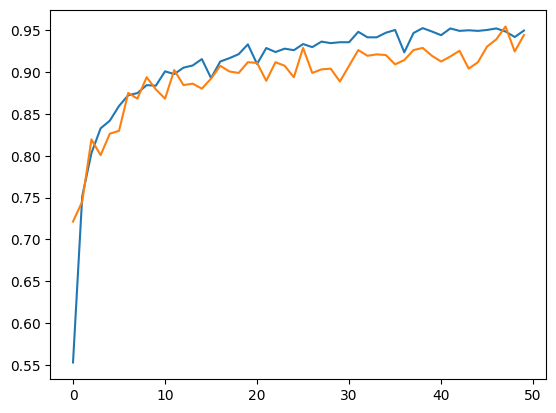

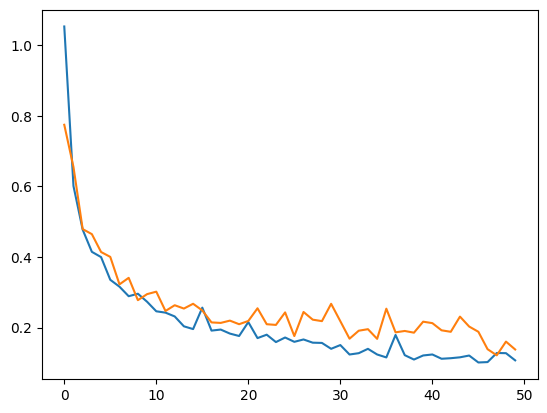

In [387]:
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()
# View Loss Graph
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()